                                         DATA MINING TECHNIQUES
                                             Project 2

                            Project implemented by undergraduate students:

                                           Gkatsis Vasileios
                                           Varsou Panagiota

In [2]:
#Αρχικά Κάνουμε Import Τις Απαραίτητες Βιβλιοθήκες
import folium
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from folium.plugins import MarkerCluster
from sklearn.cluster import KMeans

                            The program starts by reading data from Crime.csv

In [4]:
#Read Crime Data Απο Το Αρχείο Crime.csv
data = pd.read_csv("crime.csv", encoding="ISO-8859-1", low_memory=False)

                            We start by presenting graphs depicting number of Cimes
                                    daily, monthly, yearly, and by district.

                                            Crimes Daily

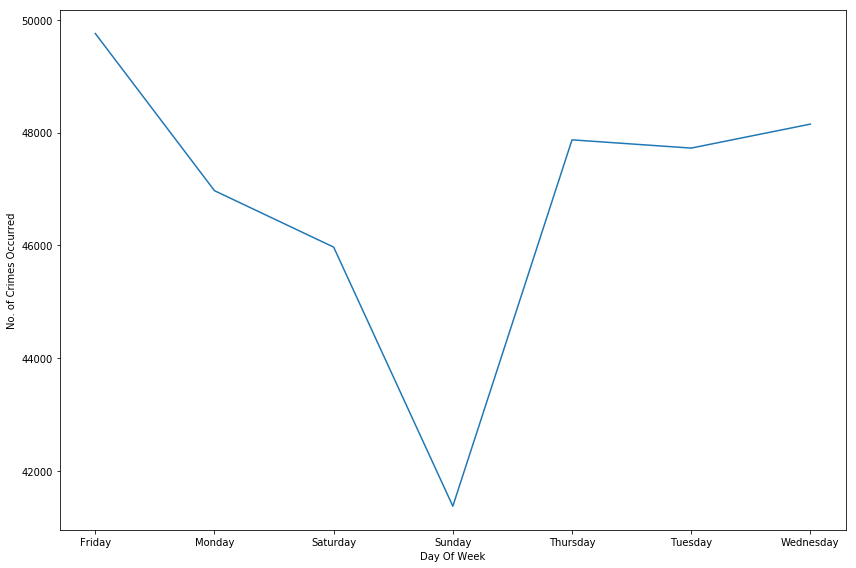

In [5]:
#Plot graph of daily crimes
df = data.groupby(["DAY_OF_WEEK"])["OFFENSE_CODE"].count().reset_index()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p=sns.lineplot(x=df.iloc[:,0], y=df.iloc[:,1], data=df)
p.set_ylabel("No. of Crimes Occurred")
p.set_xlabel("Day Of Week")
plt.tight_layout()
plt.show()

                                             Crimes Monthly

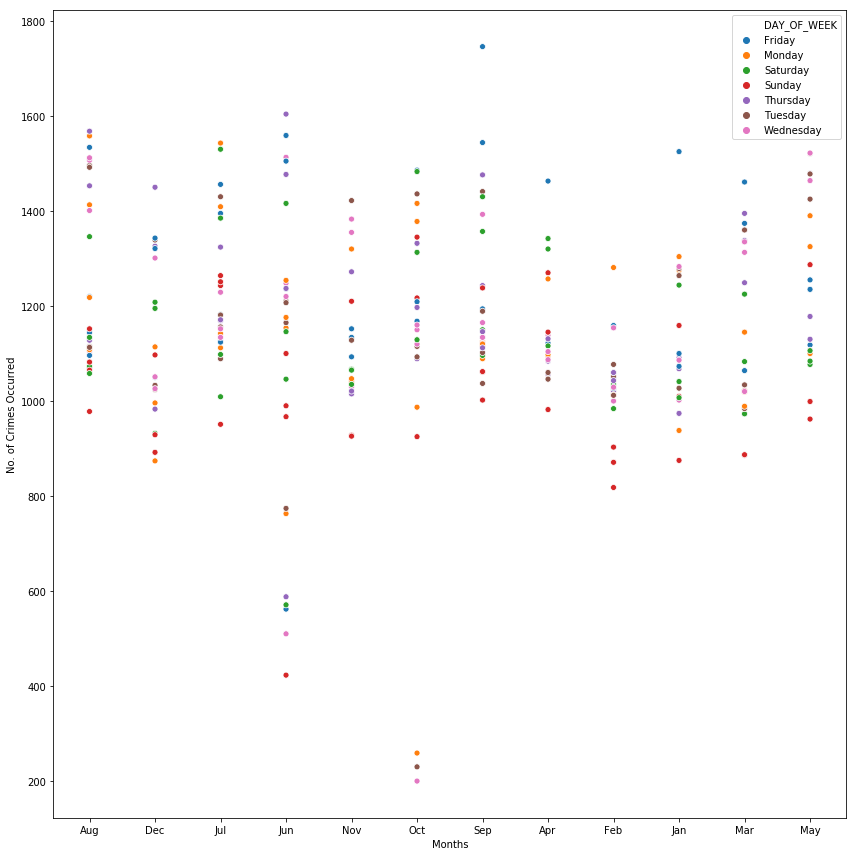

In [6]:
#Plot graph of crimes monthly
import calendar
data["MONTH_NAME"] = data["MONTH"].apply(lambda x : calendar.month_abbr[x])

df = data.groupby(["YEAR","MONTH_NAME","DAY_OF_WEEK"])["OFFENSE_CODE"].count().reset_index()
df
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
p = sns.scatterplot(x="MONTH_NAME", y="OFFENSE_CODE", hue="DAY_OF_WEEK", data=df)
p.set_ylabel("No. of Crimes Occurred")
p.set_xlabel("Months")
plt.tight_layout()
plt.show()

                                           Crimes Yearly

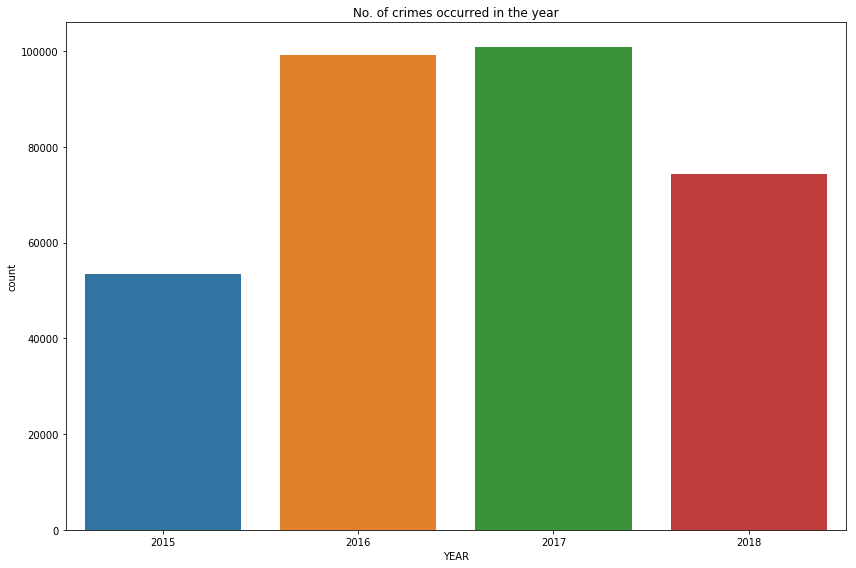

In [7]:
#Plot graph of crimes yearly
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
sns.countplot(x="YEAR", data=data)
ax.set_title("No. of crimes occurred in the year")
plt.tight_layout()
plt.show()

                                     Crimes by District

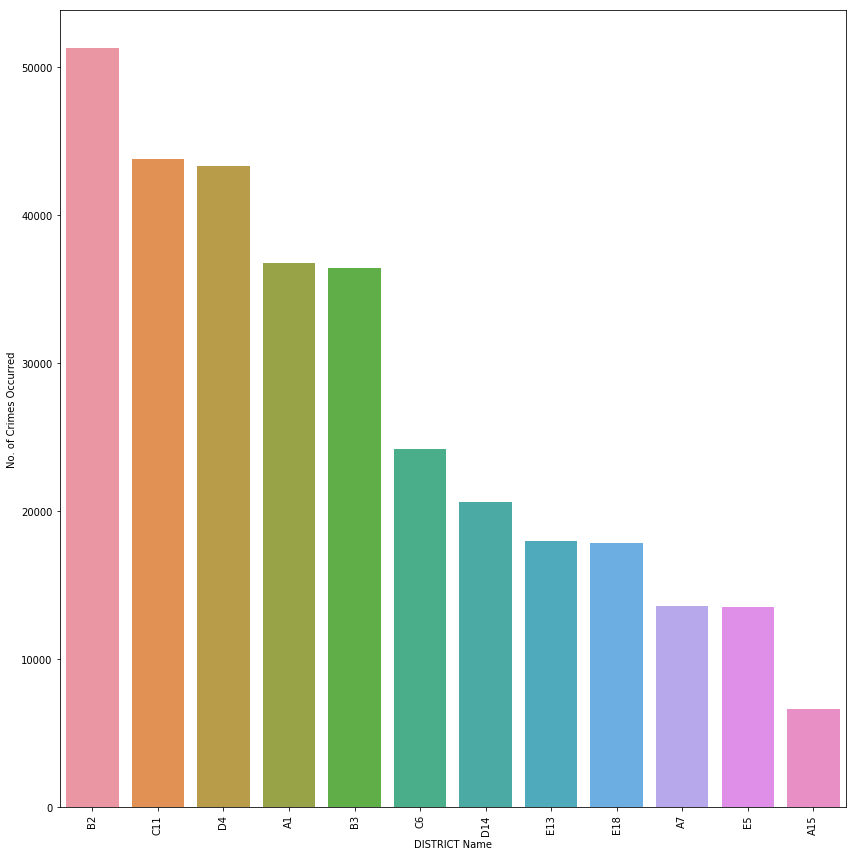

In [104]:
#Crimes by District
df = data["DISTRICT"].value_counts().head(327821).reset_index()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
p = sns.barplot(x=df.iloc[:,0], y=df["DISTRICT"], data=df)#, palette="spring")
p.set_ylabel("No. of Crimes Occurred")
p.set_xlabel("DISTRICT Name")
p.set_xticklabels(p.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

                             Visualize data using 'shooting' column

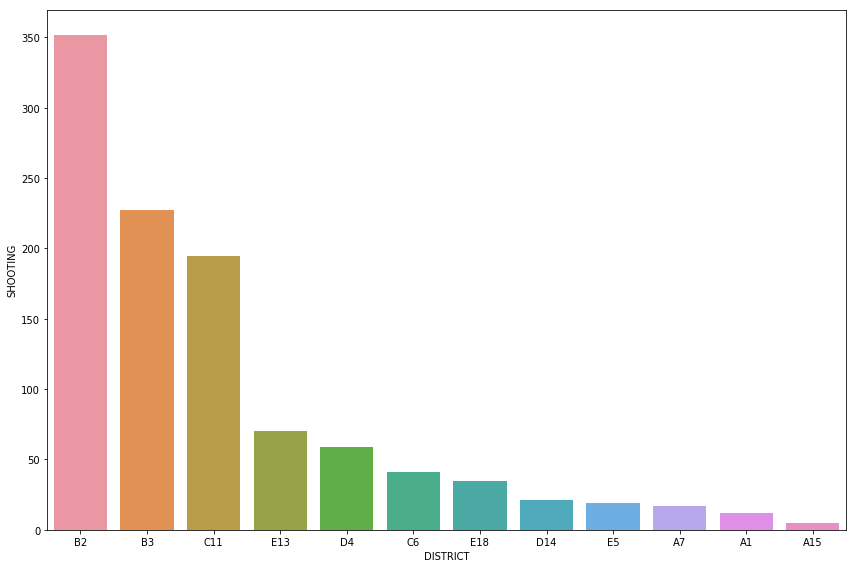

In [8]:
#Graph of Shootings by District
shootingOccurred = data[data["SHOOTING"] == "Y"].groupby("DISTRICT").agg("SHOOTING").count().reset_index().sort_values("SHOOTING", ascending=False)
shootingOccurred
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x=shootingOccurred.DISTRICT, y=shootingOccurred.SHOOTING, data=shootingOccurred)
plt.tight_layout()
plt.show()


                             Most of the shootings happen in district 
                                                B2

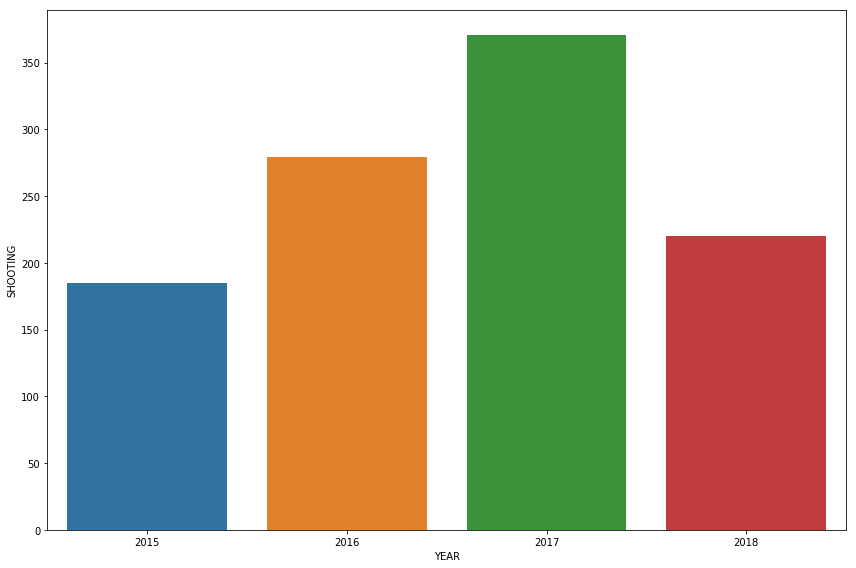

In [9]:
#Shootings Yearly
shootingOccurred = data[data["SHOOTING"] == "Y"].groupby("YEAR").agg("SHOOTING").count().reset_index().sort_values("SHOOTING", ascending=False)
shootingOccurred
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x=shootingOccurred.YEAR, y=shootingOccurred.SHOOTING, data=shootingOccurred)
plt.tight_layout()
plt.show()

                                Most shootings have happened in year 2017

                       We now create an extra column containing the information of 
                                 wheather the crime happened day or night

In [10]:
#Create the extra column by the name Daytime
daytime = list()

for hour in data["HOUR"]:
    if((hour >= 18) or (hour <= 6) ):
        daytime.append("Night")
    else:
        daytime.append("Day")
        
data = data.assign(DAYTIME=pd.Series(daytime))

In [11]:
#Turn null values of 'shooting' column into 'no'
values = {'SHOOTING':'N'}

data = data.fillna(value=values)

                  The results show that the majority of crimes happens during daytime

In [12]:
print (data['DAYTIME'].value_counts())

Day      184268
Night    143552
Name: DAYTIME, dtype: int64


                                  Visualizing the above observation

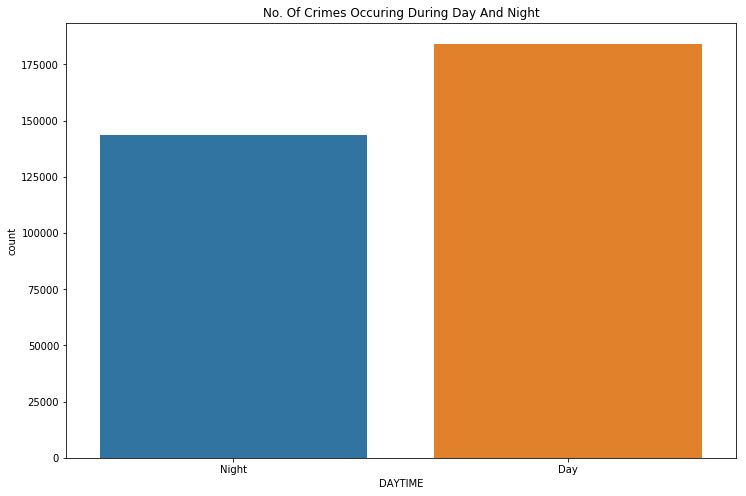

In [13]:
#Graph of crimes by day and night
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
sns.countplot(x="DAYTIME", data=data)
ax.set_title("No. Of Crimes Occuring During Day And Night")

plt.show()

                       Now we create a graph for crime frequency during day and nigth.
       The final conclusion is that the most frequent crime in daytime is Motor Vehical Accident Response

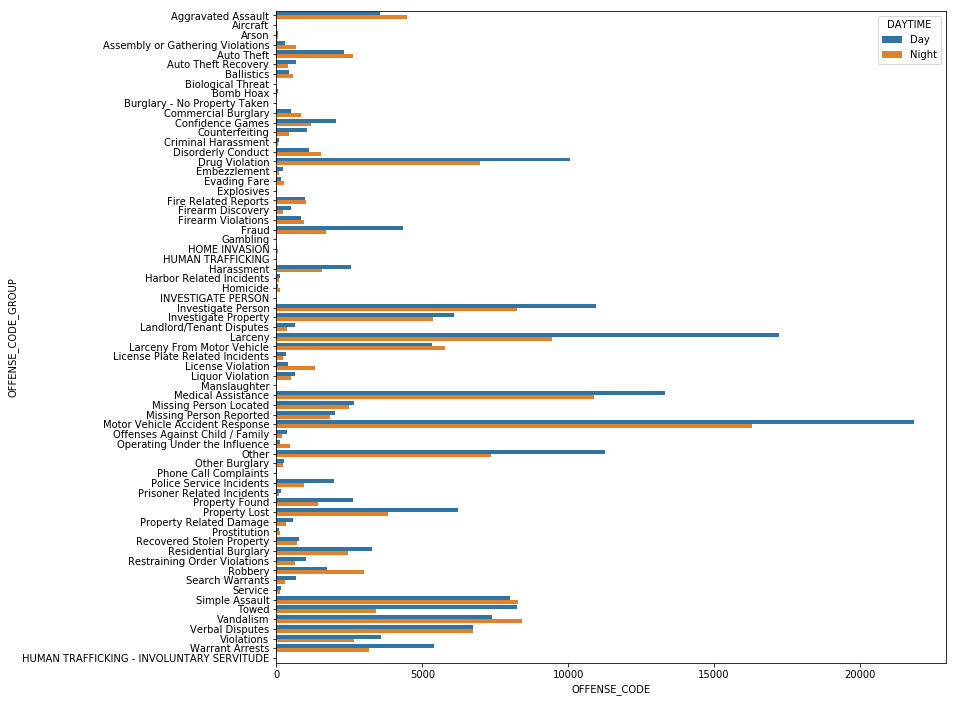

In [14]:
#Graph of crimes frequency during day and night
df = data.groupby(["DAYTIME","OFFENSE_CODE_GROUP"])["OFFENSE_CODE"].count().reset_index()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
p = sns.barplot(x="OFFENSE_CODE",y="OFFENSE_CODE_GROUP",hue="DAYTIME", data = df)

plt.show()

                            Next we apply Clustering using columns Lat and Log

In [15]:
#Clustering function with KMeans algorithm

def KMeans_Clustering(data, clusters):
    
    location = data[['Lat','Long']]
    location = location.dropna()
    location = location.loc[(location['Lat']>40) & (location['Long']<-60)]
    
    km = KMeans(n_clusters = clusters)
    km.fit(location)
    labels = km.predict(location)
    center = km.cluster_centers_
    
    lb = pd.DataFrame(labels)

    location.insert((location.shape[1]),'label',lb)
    
    return location, lb

In [16]:
#Function ploting clustering graph
def Plot_Clusters(location,a):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    scatter = ax.scatter(location['Long'],location['Lat'],
                          c=a[0],s=50)
    ax.set_title('K-Means Clustering')
    plt.colorbar(scatter)
    plt.show()

In [17]:
#Clustering function with KMeans algorithm for 3 colunmns
def KMeans_3Col_Clustering(data, clusters):
    
    crime_data = data[['Lat','Long','MONTH']]
    crime_data = crime_data.dropna()
    crime_data = crime_data.loc[(crime_data['Lat']>40) & (crime_data['Long']<-60)]
    
    km = KMeans(n_clusters = clusters)
    km.fit(crime_data)
    labels = km.predict(crime_data)
    center = km.cluster_centers_
    
    lb = pd.DataFrame(labels)

    crime_data.insert((crime_data.shape[1]),'label',lb)
    
    return crime_data, lb

In [18]:
#Function plotting 3 column clustering
def Plot_3Col_Clusters(location,a):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    scatter = ax.scatter(location['Long'],location['Lat'], c=location['MONTH'],s=50)
    ax.set_title('3Col_K-Means Clustering')
    plt.colorbar(scatter)
    plt.show()

                                       2 CLUSTERS

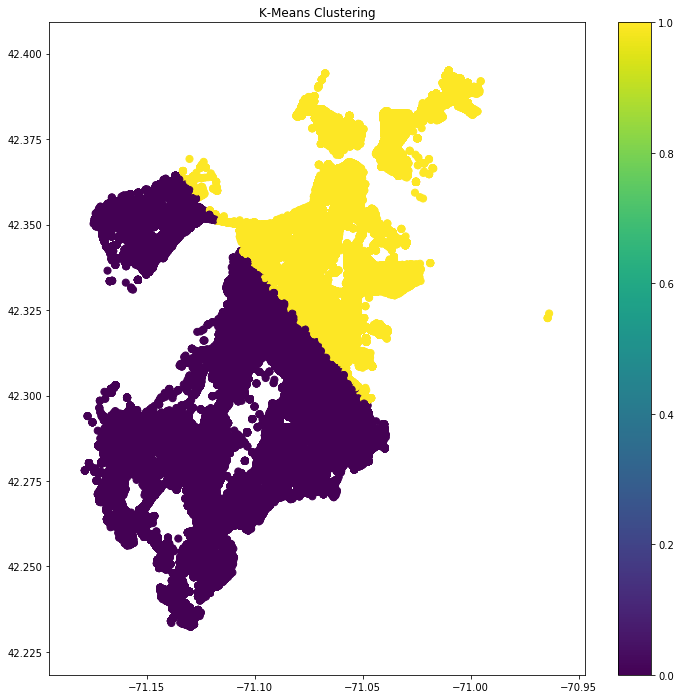

In [19]:
#Clustering with 2 Clusters
new_location, lb = KMeans_Clustering(data, 2)

Plot_Clusters(new_location,lb)

                                        3 CLUSTERS

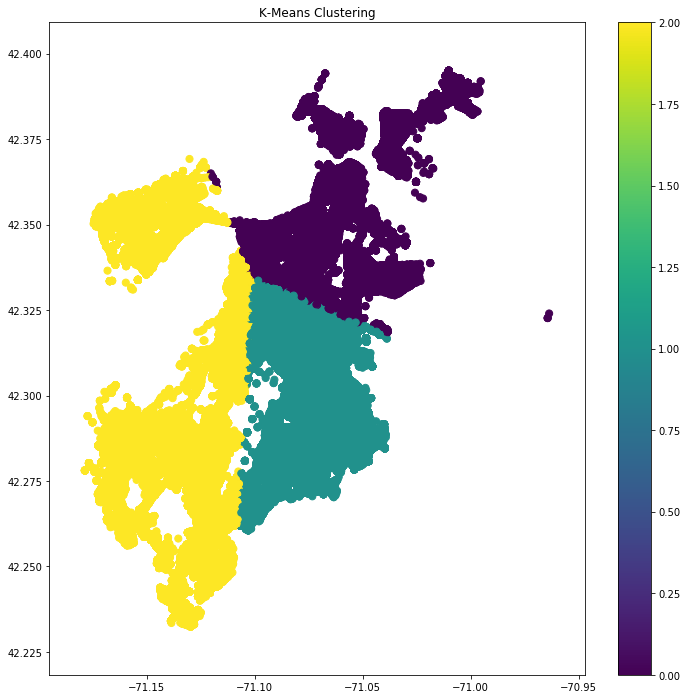

In [20]:
#Clustering with 3 Clusters
new_location, lb = KMeans_Clustering(data, 3)

Plot_Clusters(new_location,lb)

                                        5 CLUSTERS

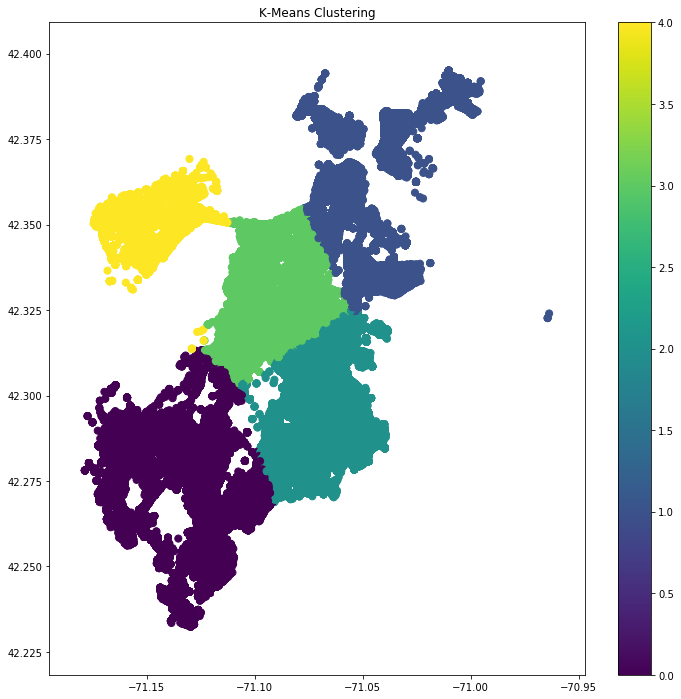

In [21]:
#Clustering with 5 Clusters
new_location, lb = KMeans_Clustering(data, 5)

Plot_Clusters(new_location,lb)

                                       10 CLUSTERS

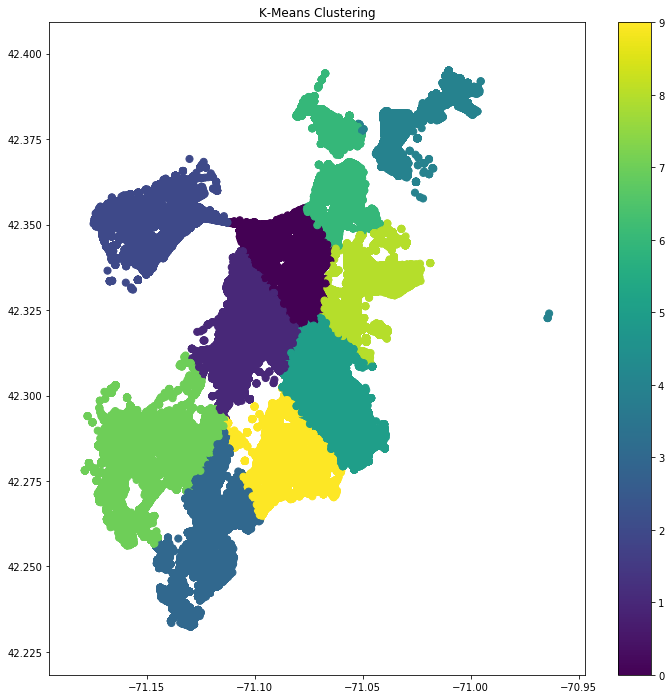

In [22]:
#Clustering with 10 Clusters
new_location, lb = KMeans_Clustering(data, 10)

Plot_Clusters(new_location,lb)

                                   3 ΣΤΗΛΕΣ & 3 CLUSTERS

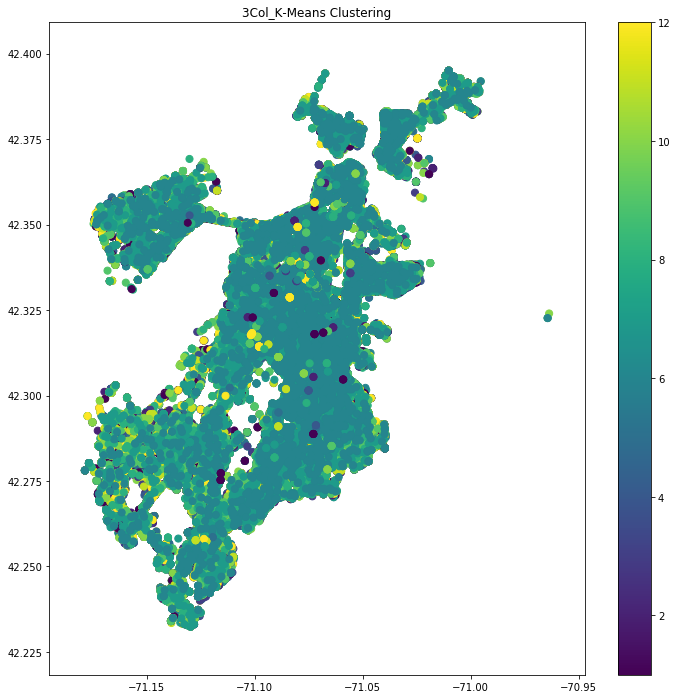

In [17]:
#Clustering with 3 Columns and 3 Clusters
new_location, lb = KMeans_3Col_Clustering(data, 3)

Plot_3Col_Clusters(new_location,lb)

                            Gather spacial data for Larceny crime.

In [23]:
#Choose data in order to create Interactive Map
larceny = data.loc[data['OFFENSE_CODE_GROUP'] == 'Larceny']
larceny_data = larceny.groupby(['Lat','Long'])['OFFENSE_CODE'].count().reset_index()

                              Execute the algorithm which plots the map

In [24]:
#Interactive map plotting algorithm
boston_map = folium.Map(location=[42.361145, -71.057083],
                        zoom_start=13)

for i in range(1000):
    lat = larceny_data.iloc[i][0]
    long = larceny_data.iloc[i][1]
    larceny_mult = larceny_data.iloc[i][2]
    radius = larceny_mult / 5
    
    if larceny_mult <= 40:
        color = "#00b000"
    elif larceny_mult <= 60:
        color = "#f5b000"
    else:
        color = "#db0000"
    
    popup_text = """Latitude : {}<br>
                  Longitude : {}<br>
                  No Of Latencies : {}<br>"""
    
    popup_text = popup_text.format(lat,long,larceny_mult)
    
    folium.CircleMarker(location = [lat, long],radius=radius, popup=popup_text 
                                    ,color=color, fill = True).add_to(boston_map)

In [25]:
boston_map